In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels

In [3]:
boston = pd.read_csv(r"C:\Users\HP\Desktop\datasets\BostonHousing.csv")

In [4]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


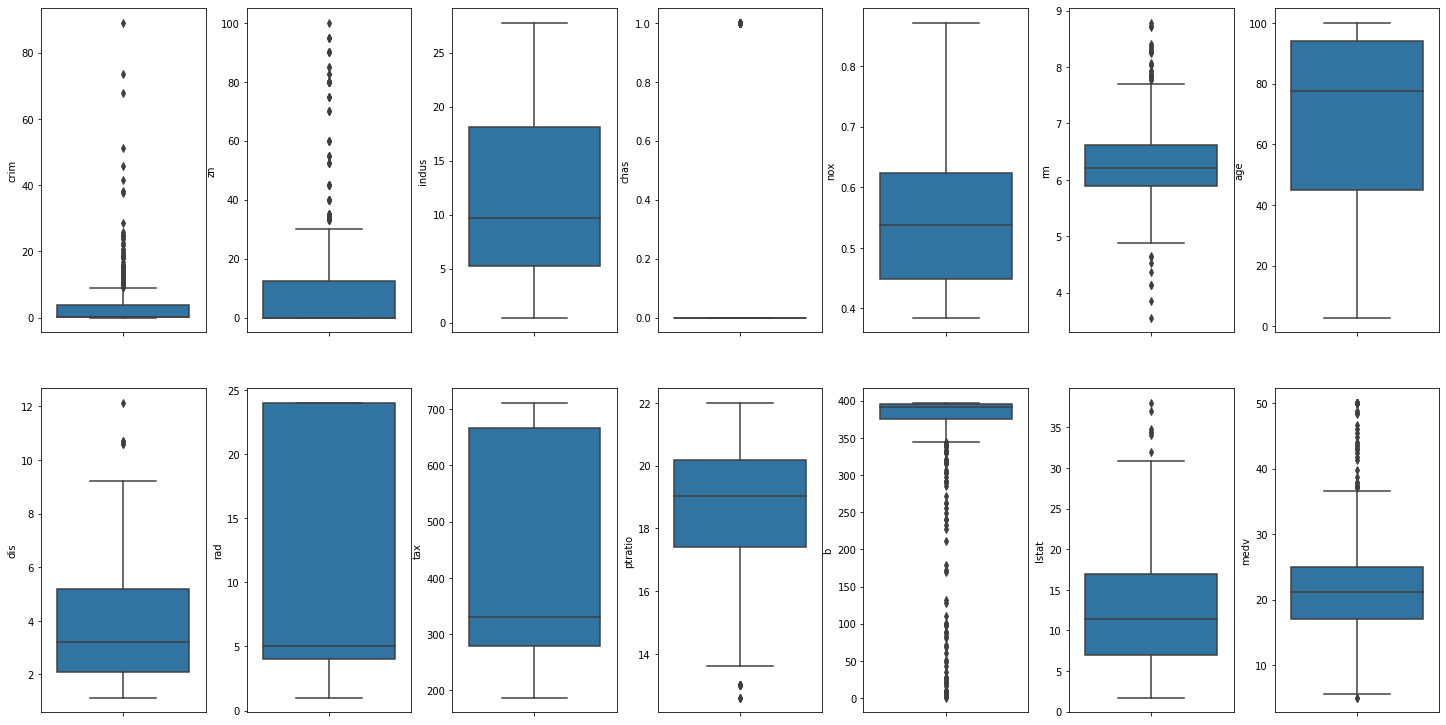

In [6]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k, v in boston.items():
    sns.boxplot(y=v, data=boston, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.1, h_pad=5.0)
plt.show()

In [7]:
axs   #memory locations of the subplots is being shown
#all subplots are array objects

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026370A0E5C8>,
      dtype=object)

In [13]:
#for k, v in boston.items():
#    print(k)
#    print(v)

In [8]:
boston = boston[~(boston['medv'] >= 50.0)]
print(np.shape(boston))

(490, 14)


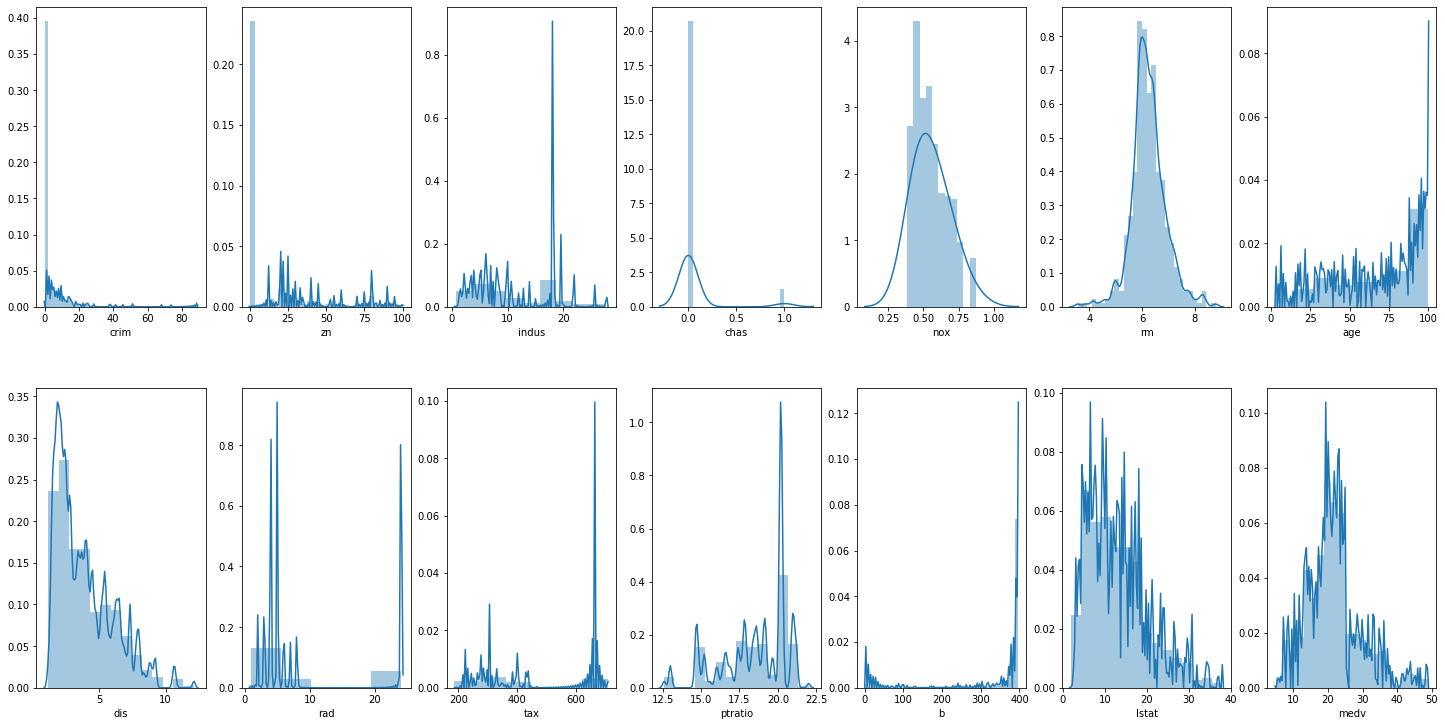

In [9]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten();
for k, v in boston.items():
    sns.distplot(v, ax = axs[index], kde_kws={'bw':0.1})
    index+=1
plt.tight_layout(pad=0.4, w_pad=0.1, h_pad=5.0)
plt.show()

In [10]:
boston.corr()

#check for values >=0.9 for different features. Consider only one such value

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.199075,0.408053,-0.064210,0.420476,-0.219307,0.353751,-0.382231,0.627434,0.583711,0.287079,-0.384460,0.461755,-0.450115
zn,-0.199075,1.000000,-0.527121,-0.053911,-0.512137,0.310506,-0.563184,0.673227,-0.307726,-0.302897,-0.381815,0.176117,-0.422090,0.404608
indus,0.408053,-0.527121,1.000000,0.035815,0.765155,-0.412413,0.637970,-0.710284,0.596124,0.717678,0.387656,-0.363394,0.636527,-0.600005
chas,-0.064210,-0.053911,0.035815,1.000000,0.085619,0.044979,0.071194,-0.077705,-0.032786,-0.067743,-0.116830,0.041707,-0.006486,0.074803
nox,0.420476,-0.512137,0.765155,0.085619,1.000000,-0.322609,0.727671,-0.768122,0.612160,0.667380,0.188381,-0.383087,0.612444,-0.524451
rm,-0.219307,0.310506,-0.412413,0.044979,-0.322609,1.000000,-0.268464,0.245789,-0.195768,-0.281955,-0.293299,0.119204,-0.610369,0.686634
age,0.353751,-0.563184,0.637970,0.071194,0.727671,-0.268464,1.000000,-0.743043,0.451939,0.499682,0.268459,-0.279002,0.637879,-0.492915
dis,-0.382231,0.673227,-0.710284,-0.077705,-0.768122,0.245789,-0.743043,1.000000,-0.491875,-0.532025,-0.246773,0.299426,-0.536493,0.368813
rad,0.627434,-0.307726,0.596124,-0.032786,0.612160,-0.195768,0.451939,-0.491875,1.000000,0.909000,0.456035,-0.451534,0.510192,-0.476296
tax,0.583711,-0.302897,0.717678,-0.067743,0.667380,-0.281955,0.499682,-0.532025,0.909000,1.000000,0.452252,-0.448211,0.566467,-0.572442


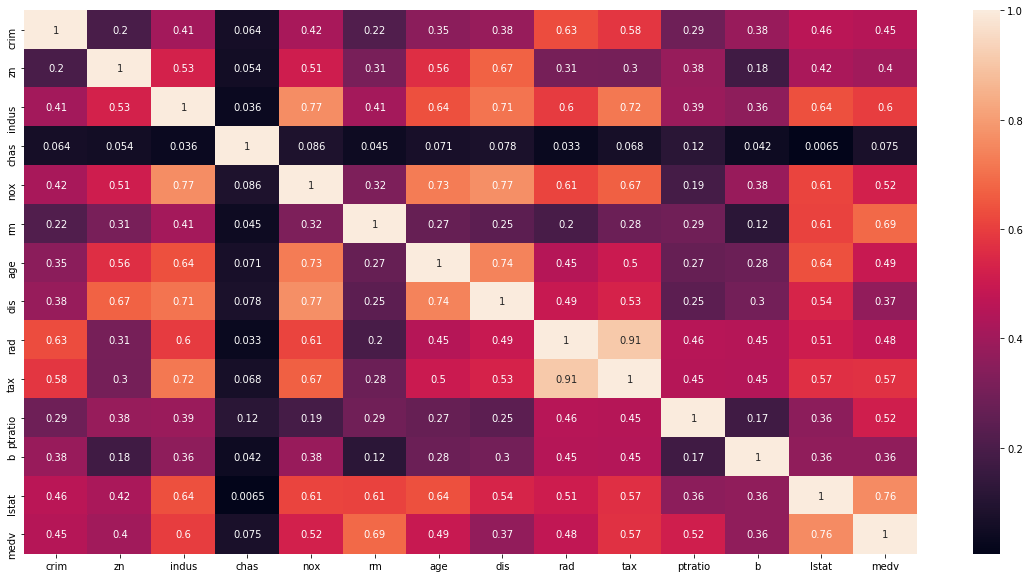

In [11]:
#heatmap is the visual representation of correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(boston.corr().abs(), annot=True)   #annot = True to print values along with the color
plt.show()
#lighter values in heatmap represent high collinearity

In [12]:
c =boston.corr()

In [13]:
cm = c['medv']

In [14]:
cm

crim      -0.450115
zn         0.404608
indus     -0.600005
chas       0.074803
nox       -0.524451
rm         0.686634
age       -0.492915
dis        0.368813
rad       -0.476296
tax       -0.572442
ptratio   -0.518641
b          0.364928
lstat     -0.759837
medv       1.000000
Name: medv, dtype: float64

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
column_sels = ['lstat', 'indus', 'nox', 'ptratio', 'rm', 'tax']
x = boston.loc[:, column_sels]
y = boston['medv']
data=sc.fit_transform(x)
x = pd.DataFrame(data, columns=column_sels)

In [16]:
x

,lstat,indus,nox,ptratio,rm,tax
0,-1.122679,-1.291856,-0.139895,-1.527280,0.505040,-0.667101
1,-0.534772,-0.593329,-0.731821,-0.341504,0.269017,-0.988734
2,-1.256937,-0.593329,-0.731821,-0.341504,1.439934,-0.988734
3,-1.410980,-1.310933,-0.826186,0.085376,1.153335,-1.107857
4,-1.073216,-1.310933,-0.826186,0.085376,1.381694,-1.107857
...,...,...,...,...,...,...
485,-0.459871,0.119873,0.160357,1.176290,0.532627,-0.804093
486,-0.543252,0.119873,0.160357,1.176290,-0.192299,-0.804093
487,-1.029406,0.119873,0.160357,1.176290,1.119618,-0.804093
488,-0.910694,0.119873,0.160357,1.176290,0.840682,-0.804093


In [17]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 490, dtype: float64

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

In [19]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
y_pred = lr.predict(x_test)

In [21]:
lr.coef_

array([-2.79173199, -0.05219442, -0.62198316, -1.59304372,  2.69638992,
       -0.87262009])

In [22]:
lr.intercept_

21.591235307502004

In [23]:
from sklearn.metrics import r2_score, mean_squared_error

In [24]:
r2_score(y_test, y_pred) #unknown or prediction accuracy

0.7292233025132615

In [25]:
lr.score(x_train, y_train)  #known

0.730312580069958

In [26]:
mean_squared_error(y_test, y_pred)

22.7166131126578

We use polynomial features to increase the accuracy

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
poly_reg = PolynomialFeatures(degree=3)
x_poly_train = poly_reg.fit_transform(x_train)
#Fit to data, then transform it. Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X.

In [30]:
poly_reg = PolynomialFeatures(degree=3)
x_poly_test = poly_reg.fit_transform(x_test)

In [32]:
ro_2 = LinearRegression()
ro_2.fit(x_poly_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
y_pred_poly = ro_2.predict(x_poly_test)

In [35]:
r2_score(y_pred_poly, y_test)

0.8481431285052483

In [36]:
ro_2.score(x_poly_train, y_train)

0.9148002578238768